# BERNOULLINB ALGORITHEM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('WSN.csv')
df.head()

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy,Attack type
0,101000,50,1,101000,0.00000,1,0,0,25,1,0,0,0,1200,48,130.08535,0,2.46940,Normal
1,101001,50,0,101044,75.32345,0,4,1,0,0,1,2,38,0,0,0.00000,4,0.06957,Normal
2,101002,50,0,101010,46.95453,0,4,1,0,0,1,19,41,0,0,0.00000,3,0.06898,Normal
3,101003,50,0,101044,64.85231,0,4,1,0,0,1,16,38,0,0,0.00000,4,0.06673,Normal
4,101004,50,0,101010,4.83341,0,4,1,0,0,1,25,41,0,0,0.00000,3,0.06534,Normal


In [3]:
df=df.dropna()

In [4]:
df.columns

Index([' id', ' Time', ' Is_CH', ' who CH', ' Dist_To_CH', ' ADV_S', ' ADV_R',
       ' JOIN_S', ' JOIN_R', ' SCH_S', ' SCH_R', 'Rank', ' DATA_S', ' DATA_R',
       ' Data_Sent_To_BS', ' dist_CH_To_BS', ' send_code ', 'Expaned Energy',
       'Attack type'],
      dtype='object')

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

var = ['Attack_type']
  
for i in var:
    df[i] = le.fit_transform(df[i]).astype(int)

In [6]:
df = df.drop_duplicates()

In [7]:
x1 = df.drop(labels='Attack_type', axis=1)
y1 = df.loc[:,'Attack_type']

In [8]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros =RandomOverSampler(random_state=42)
x,y=ros.fit_resample(x1,y1)
print("OUR DATASET COUNT         : ", Counter(y1))
print("OVER SAMPLING DATA COUNT  : ", Counter(y))

OUR DATASET COUNT         :  Counter({3: 332040, 2: 13909, 0: 10049, 4: 6633, 1: 3157})
OVER SAMPLING DATA COUNT  :  Counter({3: 332040, 1: 332040, 4: 332040, 2: 332040, 0: 332040})


In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)
print("NUMBER OF TRAIN DATASET    : ", len(x_train))
print("NUMBER OF TEST DATASET      : ", len(x_test))
print("TOTAL NUMBER OF DATASET    : ", len(x_train)+len(x_test))

NUMBER OF TRAIN DATASET    :  1328160
NUMBER OF TEST DATASET      :  332040
TOTAL NUMBER OF DATASET    :  1660200


In [10]:
print("NUMBER OF TRAIN DATASET    : ", len(y_train))
print("NUMBER OF TEST DATASET      : ", len(y_test))
print("TOTAL NUMBER OF DATASET    : ", len(y_train)+len(y_test))

NUMBER OF TRAIN DATASET    :  1328160
NUMBER OF TEST DATASET      :  332040
TOTAL NUMBER OF DATASET    :  1660200


In [11]:
from sklearn.naive_bayes import BernoulliNB

In [12]:
BNB = BernoulliNB()
BNB.fit(x_train,y_train)

BernoulliNB()

In [13]:
predicted = BNB.predict(x_test)

In [14]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,predicted)
print('THE CLASSIFICATION REPORT OF BERNOULLINB:\n\n',cr)

THE CLASSIFICATION REPORT OF BERNOULLINB:

               precision    recall  f1-score   support

           0       0.62      0.63      0.62     66408
           1       0.55      0.99      0.70     66408
           2       0.80      0.00      0.00     66408
           3       0.94      0.97      0.96     66408
           4       0.66      0.75      0.70     66408

    accuracy                           0.67    332040
   macro avg       0.71      0.67      0.60    332040
weighted avg       0.71      0.67      0.60    332040



In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted)
print('THE CONFUSION MATRIX SCORE OF BERNOULLINB:\n\n\n',cm)

THE CONFUSION MATRIX SCORE OF BERNOULLINB:


 [[41893     0     0     0 24515]
 [    0 65487     0     0   921]
 [26027 40301     4     0    76]
 [    0  1765     1 64631    11]
 [    0 12222     0  4196 49990]]


In [17]:
from sklearn.metrics import accuracy_score
a = accuracy_score(y_test,predicted)
print("THE ACCURACY SCORE OF BERNOULLINB IS :",a*100)

THE ACCURACY SCORE OF BERNOULLINB IS : 66.86092037103964


In [18]:
from sklearn.metrics import hamming_loss
hl = hamming_loss(y_test,predicted)
print("THE HAMMING LOSS OF BERNOULLINB IS :",hl*100)

THE HAMMING LOSS OF BERNOULLINB IS : 33.13907962896037


THE CONFUSION MATRIX SCORE OF BERNOULLINB:


[[41893     0     0     0 24515]
 [    0 65487     0     0   921]
 [26027 40301     4     0    76]
 [    0  1765     1 64631    11]
 [    0 12222     0  4196 49990]]


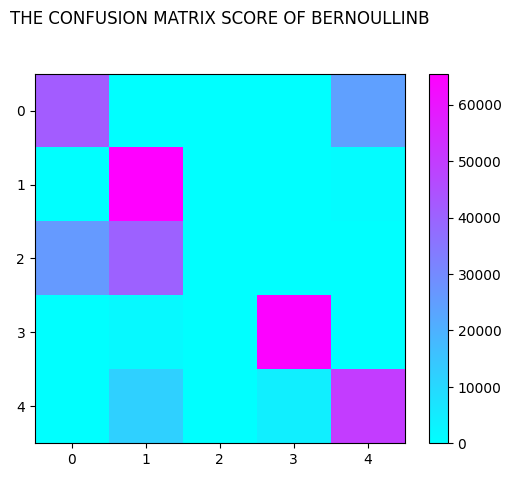

In [19]:
def plot_confusion_matrix(cm, title='THE CONFUSION MATRIX SCORE OF BERNOULLINB\n\n', cmap=plt.cm.cool):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

cm1=confusion_matrix(y_test, predicted)
print('THE CONFUSION MATRIX SCORE OF BERNOULLINB:\n\n')
print(cm)
plot_confusion_matrix(cm)

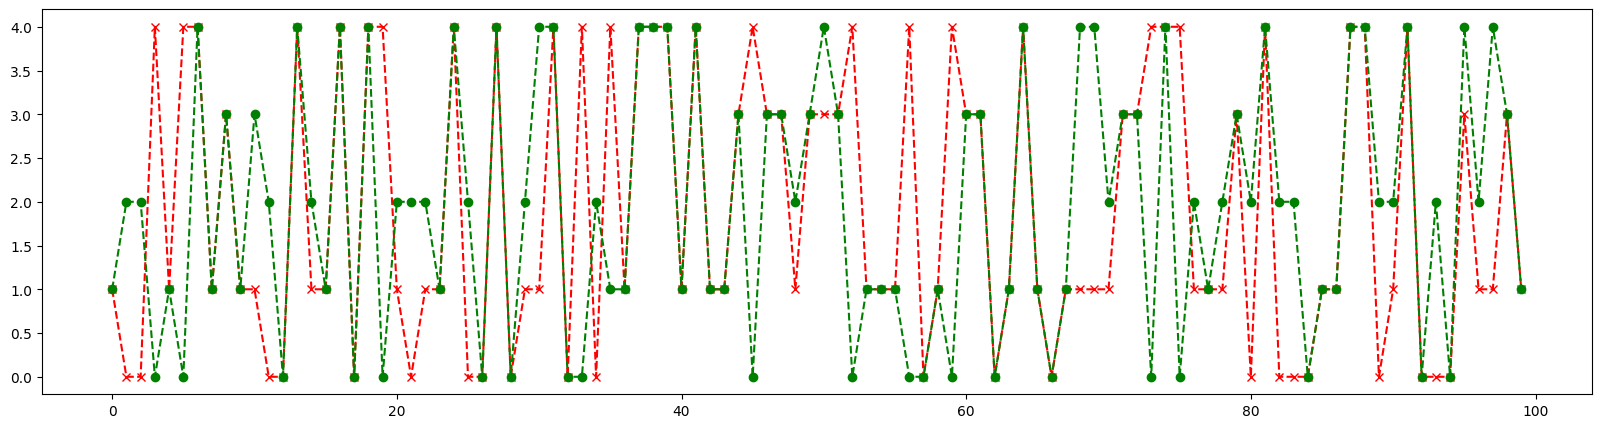

In [20]:
import matplotlib.pyplot as plt
df2 = pd.DataFrame()
df2["y_test"] = y_test
df2["predicted"] = predicted
df2.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(df2["predicted"][:100], marker='x', linestyle='dashed', color='red')
plt.plot(df2["y_test"][:100],  marker='o', linestyle='dashed', color='green')
plt.show()